In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
df = pd.read_csv('/content/data_merged.csv')

In [4]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
0,0.0131,0.2560,182347,0.895,0,0.000106,0.0821,-4.860,29,0.0707,...,0.583424,35.272231,1,0,0,1,0,0,0,0
1,0.9800,0.2770,206972,0.145,0,0.879000,0.1110,-19.898,0,0.0845,...,0.432251,3.672500,1,1,0,0,0,0,0,0
2,0.7950,0.6850,314667,0.483,0,0.878000,0.1130,-10.202,1,0.0337,...,0.447291,7.707000,1,0,0,0,1,0,0,0
3,0.6560,0.7880,179747,0.808,0,0.000000,0.1540,-6.590,0,0.0395,...,0.447291,7.707000,1,0,0,0,1,0,0,0
4,0.3020,0.0753,498560,0.150,0,0.884000,0.1210,-16.705,0,0.0371,...,0.443625,3.419500,1,1,0,0,0,0,0,0


In [5]:
X = df[df.columns.difference(['popularity'])]
y = pd.cut(x=df["popularity"], bins=[-1,42,100], labels=[0,1])

# Splitting data in to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
# Initializing and training the Random Forest Classifier with default hyperparameters.
rnd_clf=RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X_train, y_train)

# Prediction on test data.
y_pred_rf=rnd_clf.predict(X_test)

print('\033[1mClassification Report')
print('\033[0m')
print(classification_report(y_test, y_pred_rf))

print('\033[1mConfusion Matrix')
print('\033[0m')
print(confusion_matrix(y_test, y_pred_rf))

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     25874
           1       0.85      0.71      0.77      8572

    accuracy                           0.90     34446
   macro avg       0.88      0.83      0.85     34446
weighted avg       0.89      0.90      0.89     34446

Confusion Matrix

[[24802  1072]
 [ 2496  6076]]


In [7]:
ext_clf=ExtraTreesClassifier(n_jobs=-1)
ext_clf.fit(X_train, y_train)
y_pred_ext=ext_clf.predict(X_test)

print('\033[1mClassification Report')
print('\033[0m')
print(classification_report(y_test, y_pred_ext))

print('\033[1mConfusion Matrix')
print('\033[0m')
print(confusion_matrix(y_test, y_pred_ext))

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     25874
           1       0.83      0.70      0.75      8572

    accuracy                           0.89     34446
   macro avg       0.86      0.82      0.84     34446
weighted avg       0.88      0.89      0.88     34446

Confusion Matrix

[[24610  1264]
 [ 2611  5961]]


In [8]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)] # Number of Decisions Trees in the forest
max_features = ['auto', 'sqrt']                                                 # Max features used to split at each node
max_depth = np.linspace(20,100,5).tolist()                                      # Max depth of each tree
max_depth.append(None)
bootstrap = [True, False]
min_samples_split = [2, 5, 10]                                                  # Minimum samples required to split at a node
min_samples_leaf = [1, 2, 4]

In [10]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [11]:
RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20.0, 40.0, 60.0, 80.0,100.0, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,1000]},random_state=42, verbose=2)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20.0, 40.0, 60.0, 80.0,
                                                      100.0, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [12]:
rnd_clf=RandomForestClassifier(n_estimators=400, max_depth=20, max_features='sqrt', criterion='gini', min_samples_leaf=4,
                               min_samples_split=2, bootstrap=False, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf=rnd_clf.predict(X_test)

In [13]:
print('\033[1mClassification Report')
print('\033[0m')
print(classification_report(y_test, y_pred_rf))

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     25874
           1       0.86      0.70      0.78      8572

    accuracy                           0.90     34446
   macro avg       0.89      0.83      0.86     34446
weighted avg       0.90      0.90      0.90     34446



In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
lr_probs = rnd_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc

np.float64(0.94512011952031)

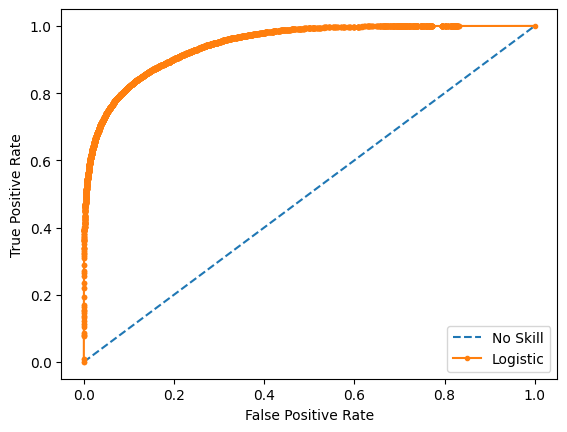

In [15]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
np.save("fpr_RFC", fpr)
np.save("tpr_RFC", tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

SVM: f1=0.776 auc=0.883
0.24885327759391512


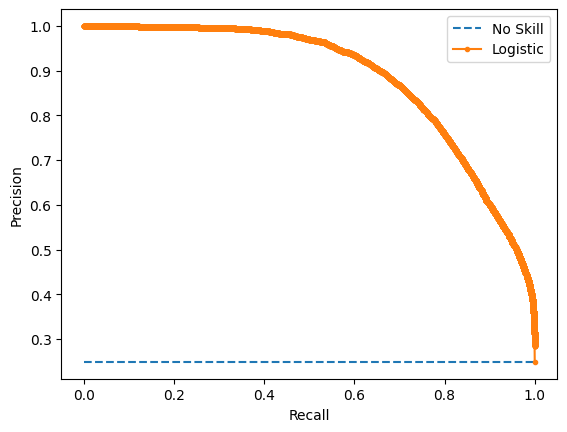

In [16]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, lr_probs)
np.save("lrp_RFC", lr_precision)
np.save("lrr_RFC", lr_recall)
lr_f1, lr_auc = f1_score(y_test, y_pred_rf), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()